In [2]:
!pip install xgboost

     |████████████████████████████████| 157.5 MB 31 kB/s /s eta 0:00:01   |███████████▋                    | 57.1 MB 62.2 MB/s eta 0:00:02     |████████████████▎               | 80.4 MB 62.2 MB/s eta 0:00:02     |███████████████████▌            | 95.9 MB 62.2 MB/s eta 0:00:01     |████████████████████████▎       | 119.3 MB 102.6 MB/s eta 0:00:01     |███████████████████████████████▍| 154.3 MB 102.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from zipfile import ZipFile
from sklearn.model_selection import train_test_split as tt
from sklearn.tree import DecisionTreeClassifier as dtc #importing Decision tree classifier from sklearn
from sklearn.metrics import classification_report as cr # classification report
from sklearn import metrics #importing metrics library to calculate the accuracy of the classifier model 
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier as xgb

# unzipping the files

In [3]:
with ZipFile('task.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [62]:
d = 'Activity Recognition from Single Chest-Mounted Accelerometer'
PATH = '../'

In [63]:
os.listdir(d)

['15.csv',
 '7.csv',
 '12.csv',
 '11.csv',
 '6.csv',
 '9.csv',
 'README',
 '4.csv',
 '5.csv',
 '1.csv',
 '13.csv',
 '8.csv',
 '2.csv',
 '3.csv',
 '.DS_Store',
 '14.csv',
 '10.csv']

def get_data_dir():
    return os.path.join(os.getcwd(),'Activity Recognition from Single Chest-Mounted Accelerometer/')

In [64]:
os.getcwd()

'/home/ec2-user/SageMaker/anushka'

In [65]:
os.path.join(os.getcwd(),'Activity Recognition from Single Chest-Mounted Accelerometer/')

'/home/ec2-user/SageMaker/anushka/Activity Recognition from Single Chest-Mounted Accelerometer/'

In [66]:
data_dir=os.path.join(os.getcwd(),'Activity Recognition from Single Chest-Mounted Accelerometer/')

In [67]:
files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]


In [68]:
files

['15.csv',
 '7.csv',
 '12.csv',
 '11.csv',
 '6.csv',
 '9.csv',
 '4.csv',
 '5.csv',
 '1.csv',
 '13.csv',
 '8.csv',
 '2.csv',
 '3.csv',
 '14.csv',
 '10.csv']

# Reading all files at once

In [71]:
s_cols = ['0', '1866', '2390', '2282', '1', 'user']

In [72]:
s_cols

['0', '1866', '2390', '2282', '1', 'user']

In [13]:
data=pd.DataFrame()
#s_cols=list(df.columns)
#s_cols = s_cols + ["id"]
id=0
ids=[]
for file_name in  files:
        id +=1
        df = pd.read_csv(data_dir + str(file_name))
        df["user"] =id
        df.columns=s_cols
        data=pd.concat([data,df],axis=0)
        ids.append(id)
        

In [14]:
data

,0,1866,2390,2282,1,user
0,1.0,1861,2367,2278,1,1
1,2.0,1837,2387,2317,1,1
2,3.0,1819,2409,2331,1,1
3,4.0,1784,2407,2280,1,1
4,5.0,1811,2414,2267,1,1
...,...,...,...,...,...,...
126795,126800.0,2140,2471,1866,7,15
126796,126800.0,2113,2469,1885,7,15
126797,126800.0,2105,2467,1908,7,15
126798,126800.0,2096,2482,1924,7,15


In [15]:
s_cols=list(df.columns)

In [16]:
data

,0,1866,2390,2282,1,user
0,1.0,1861,2367,2278,1,1
1,2.0,1837,2387,2317,1,1
2,3.0,1819,2409,2331,1,1
3,4.0,1784,2407,2280,1,1
4,5.0,1811,2414,2267,1,1
...,...,...,...,...,...,...
126795,126800.0,2140,2471,1866,7,15
126796,126800.0,2113,2469,1885,7,15
126797,126800.0,2105,2467,1908,7,15
126798,126800.0,2096,2482,1924,7,15


# Giving column names to data

In [17]:
data.columns=(["sequential number", "x acceleration", "y acceleration", "z acceleration", "label","user"])

In [18]:
data

,sequential number,x acceleration,y acceleration,z acceleration,label,user
0,1.0,1861,2367,2278,1,1
1,2.0,1837,2387,2317,1,1
2,3.0,1819,2409,2331,1,1
3,4.0,1784,2407,2280,1,1
4,5.0,1811,2414,2267,1,1
...,...,...,...,...,...,...
126795,126800.0,2140,2471,1866,7,15
126796,126800.0,2113,2469,1885,7,15
126797,126800.0,2105,2467,1908,7,15
126798,126800.0,2096,2482,1924,7,15


# Mapping labels to the activities

In [19]:
activities = {
        1: "Working at Computer",
        2: "Standing Up, Walking and Going updown stairs",
        3: "Standing",
        4: "Walking",
        5: "Going UpDown Stairs",
        6: "Walking and Talking with Someone",
        7: "Talking while Standin",        
    }

In [20]:
data['activity_1']=data.label.map(activities)

In [21]:
data

,sequential number,x acceleration,y acceleration,z acceleration,label,user,activity_1
0,1.0,1861,2367,2278,1,1,Working at Computer
1,2.0,1837,2387,2317,1,1,Working at Computer
2,3.0,1819,2409,2331,1,1,Working at Computer
3,4.0,1784,2407,2280,1,1,Working at Computer
4,5.0,1811,2414,2267,1,1,Working at Computer
...,...,...,...,...,...,...,...
126795,126800.0,2140,2471,1866,7,15,Talking while Standin
126796,126800.0,2113,2469,1885,7,15,Talking while Standin
126797,126800.0,2105,2467,1908,7,15,Talking while Standin
126798,126800.0,2096,2482,1924,7,15,Talking while Standin


In [22]:
data.describe()

,sequential number,x acceleration,y acceleration,z acceleration,label,user
count,1.926881e+06,1.926881e+06,1.926881e+06,1.926881e+06,1.926881e+06,1.926881e+06
mean,6.711335e+04,1.987653e+03,2.382524e+03,1.970597e+03,3.882921e+00,7.889726e+00
std,4.146165e+04,1.113573e+02,1.003132e+02,9.445699e+01,2.443399e+00,4.221955e+00
min,1.000000e+00,2.820000e+02,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,3.211500e+04,1.904000e+03,2.337000e+03,1.918000e+03,1.000000e+00,4.000000e+00
50%,6.423000e+04,1.992000e+03,2.367000e+03,1.988000e+03,4.000000e+00,8.000000e+00
75%,9.839400e+04,2.076000e+03,2.413000e+03,2.032000e+03,7.000000e+00,1.200000e+01
max,1.667400e+05,3.828000e+03,4.095000e+03,4.095000e+03,7.000000e+00,1.500000e+01


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1926881 entries, 0 to 126799
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   sequential number  float64
 1   x acceleration     int64  
 2   y acceleration     int64  
 3   z acceleration     int64  
 4   label              int64  
 5   user               int64  
 6   activity_1         object 
dtypes: float64(1), int64(5), object(1)
memory usage: 117.6+ MB


In [24]:
data.shape

(1926881, 7)

In [25]:
a=pd.crosstab(data.user,data.activity_1)

In [26]:
a

activity_1,Going UpDown Stairs,Standing,"Standing Up, Walking and Going updown stairs",Talking while Standin,Walking,Walking and Talking with Someone,Working at Computer
user,,,,,,,
1,3300,7910,4680,17500,17510,1000,51599
2,2960,10519,3600,83701,26770,2700,32749
3,3650,11730,4340,14901,30130,1200,48749
4,3225,8775,2330,17151,17750,1049,54169
5,3935,23495,3460,36711,22040,6989,44039
6,3115,11330,320,83660,26730,2495,36089
7,3745,21405,4810,35490,23300,1910,31539
8,3000,13420,5370,77600,26750,2880,30979
9,3191,11179,928,83748,26860,2917,33676


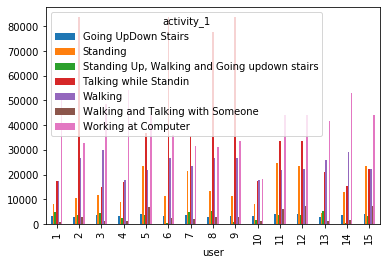

In [27]:
a.plot(kind='bar')

In [28]:
data.isnull().sum()

sequential number       0
x acceleration          0
y acceleration          0
z acceleration          0
label                   0
user                    0
activity_1           3719
dtype: int64

# Checking null values in the data

In [29]:
data[data['activity_1'].isnull()]

,sequential number,x acceleration,y acceleration,z acceleration,label,user,activity_1
103499,103500.0,1999,2532,1996,0,1,NaN
162999,163000.0,2058,2405,1943,0,2,NaN
114700,114700.0,1758,2303,2017,0,3,NaN
104449,104450.0,2038,2347,2041,0,4,NaN
47499,47500.0,1991,2322,1928,0,5,NaN
...,...,...,...,...,...,...,...
104567,104570.0,2147,2341,1948,0,12,NaN
137999,138000.0,2144,2324,1975,0,12,NaN
102339,102340.0,1983,2366,1896,0,13,NaN
116099,116100.0,1880,2366,1942,0,14,NaN


# Replacing null values with no activity

In [30]:
data['activity_1']=data['activity_1'].fillna('No_activity')

In [31]:
data.isnull().sum()

sequential number    0
x acceleration       0
y acceleration       0
z acceleration       0
label                0
user                 0
activity_1           0
dtype: int64

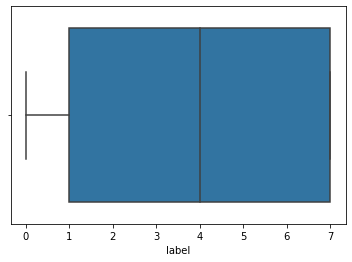

In [32]:
sns.boxplot(x=data['label'],data=data)

# Checking the distribution of the data

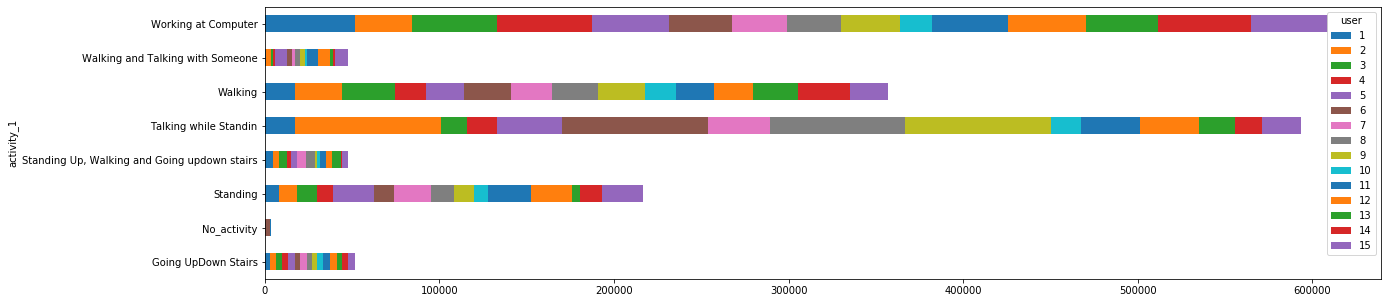

In [33]:
test = pd.crosstab(index=data.iloc[:, -1], columns=data.iloc[:, -2])
test.plot(kind = "barh", stacked = True, figsize = (20, 5));

In [34]:
data['label'].value_counts()

1    608652
7    593563
4    357064
3    216737
5     51498
2     47878
6     47770
0      3719
Name: label, dtype: int64

In [35]:
data['activity_1'].value_counts()

Working at Computer                             608652
Talking while Standin                           593563
Walking                                         357064
Standing                                        216737
Going UpDown Stairs                              51498
Standing Up, Walking and Going updown stairs     47878
Walking and Talking with Someone                 47770
No_activity                                       3719
Name: activity_1, dtype: int64

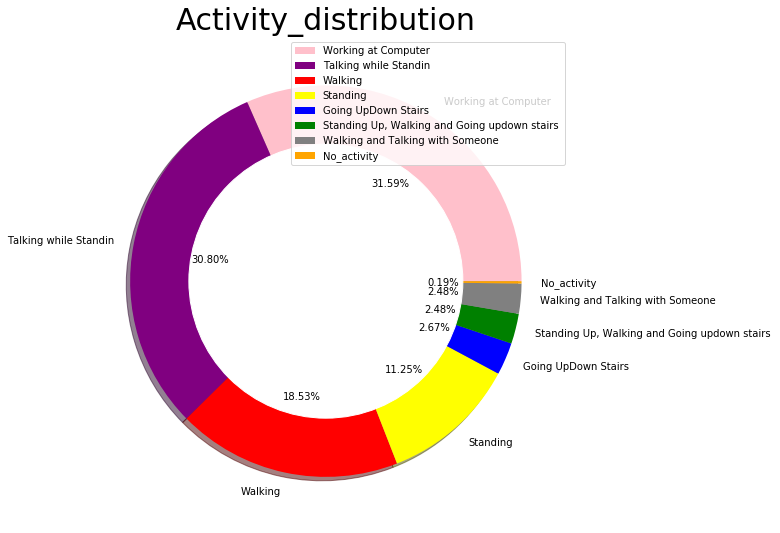

In [36]:
# plotting a donut chart 

size = [608652,593563,357064,216737,51498,47878,47770,3719]
colors = ['pink', 'purple','red','yellow','blue','green','grey',"orange"]
labels = "Working at Computer", "Talking while Standin","Walking","Standing","Going UpDown Stairs","Standing Up, Walking and Going updown stairs ","Walking and Talking with Someone","No_activity "

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Activity_distribution', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

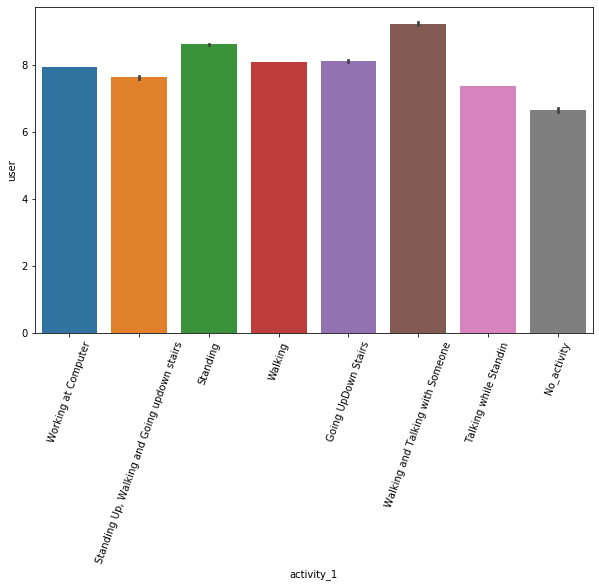

In [37]:
plt.figure(figsize = (10,6))
sns.barplot(x='activity_1', y = 'user', data = data)
plt.xticks(rotation = '70')

Text(0.5, 1.0, 'Activity histogram')

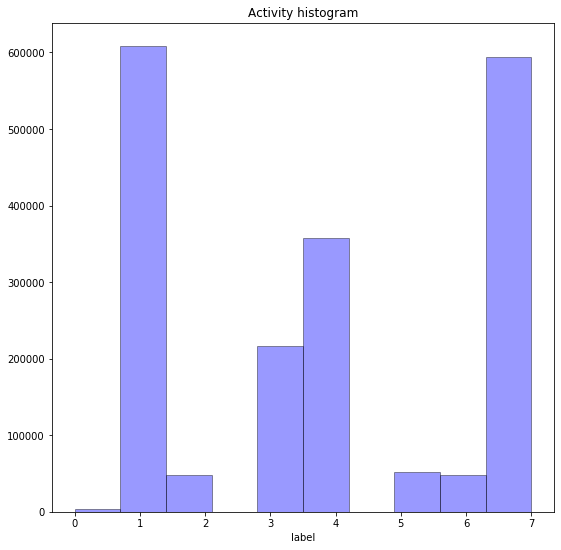

In [38]:
sns.distplot(data['label'], hist=True, kde=False, 
             bins=10, color = 'blue',
             hist_kws={'edgecolor':'black'}).set_title("Activity histogram")

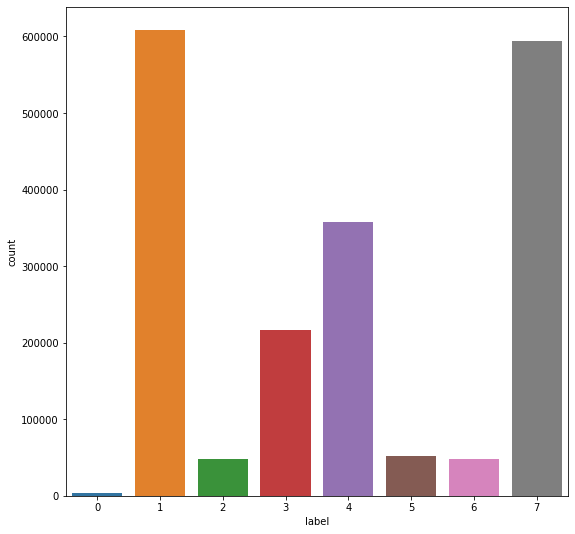

In [39]:
sns.countplot(x=data.label)

In [40]:
data.groupby('user').activity_1.value_counts()

user  activity_1                                  
1     Working at Computer                             51599
      Walking                                         17510
      Talking while Standin                           17500
      Standing                                         7910
      Standing Up, Walking and Going updown stairs     4680
                                                      ...  
15    Walking                                         22149
      Walking and Talking with Someone                 7449
      Going UpDown Stairs                              3890
      Standing Up, Walking and Going updown stairs     3435
      No_activity                                         1
Name: activity_1, Length: 120, dtype: int64

In [44]:
#data=data.drop(columns='activity_1',inplace=True)

In [45]:
data

,sequential number,x acceleration,y acceleration,z acceleration,label,user,activity_1
0,1.0,1861,2367,2278,1,1,Working at Computer
1,2.0,1837,2387,2317,1,1,Working at Computer
2,3.0,1819,2409,2331,1,1,Working at Computer
3,4.0,1784,2407,2280,1,1,Working at Computer
4,5.0,1811,2414,2267,1,1,Working at Computer
...,...,...,...,...,...,...,...
126795,126800.0,2140,2471,1866,7,15,Talking while Standin
126796,126800.0,2113,2469,1885,7,15,Talking while Standin
126797,126800.0,2105,2467,1908,7,15,Talking while Standin
126798,126800.0,2096,2482,1924,7,15,Talking while Standin


# Preparing training and testing data

In [41]:
# removing the activity column

x = data.drop(['label','activity_1','sequential number','user'], axis = 1)

y=data['label']


In [42]:
x

,x acceleration,y acceleration,z acceleration
0,1861,2367,2278
1,1837,2387,2317
2,1819,2409,2331
3,1784,2407,2280
4,1811,2414,2267
...,...,...,...
126795,2140,2471,1866
126796,2113,2469,1885
126797,2105,2467,1908
126798,2096,2482,1924


In [43]:
y

0         1
1         1
2         1
3         1
4         1
         ..
126795    7
126796    7
126797    7
126798    7
126799    0
Name: label, Length: 1926881, dtype: int64

# Splitting training and testing data

In [49]:

x_train,x_test,y_train,y_test=tt(x,y,test_size=0.30,random_state=0)

In [50]:
x_train.shape

(1348816, 3)

In [51]:
x_test.shape

(578065, 3)

In [52]:
y_train.shape

(1348816,)

In [53]:
y_test.shape

(578065,)

# Using decision tree multiclass classification

In [55]:


decision_tree = dtc(criterion = 'gini', max_depth = 15) 
decision_tree.fit(x_train, y_train) 
y_predicted = decision_tree.predict(x_test)


In [56]:
y_predicted

array([1, 3, 1, ..., 1, 1, 7])

# Checking accuracy and precision and recall

In [58]:

print('Accuracy Score for Normal Decision Tree Classifier: ', (metrics.accuracy_score(y_test, y_predicted)*100))

print("Classification Report for Normal Decision Tree :")
target_names = ['0', 'Working at computer', 'Standing up, Walking and going updown', 'Standing', 'Walking', 'Going upDown stairs', 'Walking and talking', 'Talking While Standing']
print(cr(y_test, y_predicted, digits = 3, target_names=target_names))


Accuracy Score for Normal Decision Tree Classifier:  74.01122711113803
Classification Report for Normal Decision Tree :
                                       precision    recall  f1-score   support

                                    0      0.154     0.009     0.016      1148
                  Working at computer      0.856     0.904     0.880    183018
Standing up, Walking and going updown      0.492     0.150     0.230     14359
                             Standing      0.590     0.452     0.512     64752
                              Walking      0.635     0.718     0.674    107064
                  Going upDown stairs      0.392     0.106     0.167     15454
                  Walking and talking      0.480     0.184     0.266     14207
               Talking While Standing      0.748     0.841     0.792    178063

                             accuracy                          0.740    578065
                            macro avg      0.544     0.421     0.442    578065
         

In [59]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_predicted)

print(cm, "\n")

[[    10    603      8     60    223      2      0    242]
 [    10 165518   1105   1943   5630    152     93   8567]
 [     1   5821   2158    761   2947     63     32   2576]
 [     3   3766    224  29293  14227    937    668  15634]
 [    25   8154    443   5971  76919    598    373  14581]
 [     3   1426     26   3018   6283   1639    263   2796]
 [     1    644     50   1684   2715    547   2609   5957]
 [    12   7357    372   6908  12095    238   1394 149687]] 



# For plotting confusion matrix

Visualising confusion matrix : 



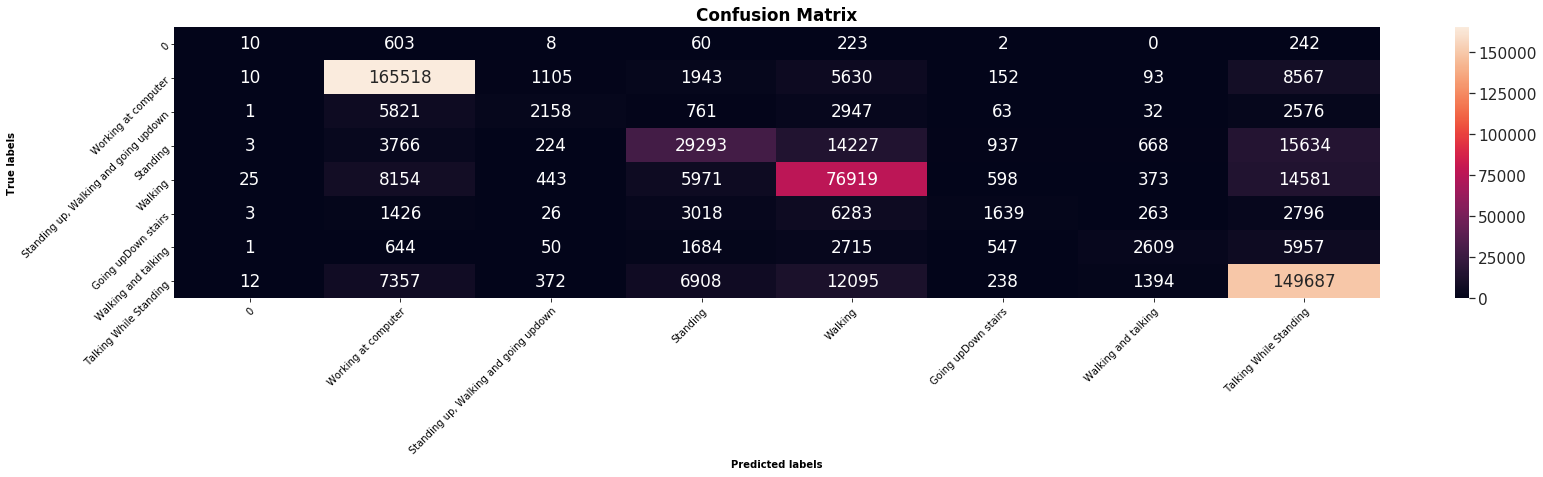

In [60]:



import seaborn as sns
import matplotlib.pyplot as plt  

print("Visualising confusion matrix : \n")

fig = plt.figure(figsize = (27, 5))
ax= plt.subplot()
target_names = ['0', 'Working at computer', 'Standing up, Walking and going updown', 'Standing', 'Walking', 'Going upDown stairs', 'Walking and talking', 'Talking While Standing']
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels', fontweight="bold");
ax.set_ylabel('True labels', fontweight="bold"); 
ax.set_title('Confusion Matrix', fontweight="bold"); 

plt.setp(ax.get_yticklabels(), rotation= 45, ha="right",
         rotation_mode="anchor")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);


     |████████████████████████████████| 157.5 MB 34 kB/s s eta 0:00:01   |███                             | 15.0 MB 1.6 MB/s eta 0:01:28     |█████████████▌                  | 66.2 MB 38.8 MB/s eta 0:00:03     |█████████████████████████████▌  | 145.0 MB 60.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


# Using XGboost classifier

In [83]:
model = xgb()

In [84]:
model.fit(x_train, y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:21:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [85]:
y_pred1 = model.predict(x_test)

# Checking accuracy and confusion matrix

In [86]:
accu(y_test,y_pred1)

0.7450704115710071

In [87]:
cmk(y_test,y_pred1)

array([[    14,    404,      0,     34,    154,      0,      1,    137],
       [     2, 111154,    535,    976,   3405,     34,     46,   5993],
       [     1,   4010,   1275,    392,   2033,     22,     19,   1844],
       [     1,   2689,     92,  18878,   9495,    600,    345,  11150],
       [     4,   5670,     63,   3268,  51987,     92,    160,  10099],
       [     0,    987,      4,   1640,   4389,   1055,     87,   2080],
       [     0,    442,      9,    990,   1779,    364,   1510,   4425],
       [     0,   5112,    118,   3797,   7550,    108,    593, 101260]])